In [1]:
import numpy as np
np.set_printoptions(precision=3) # only 3 decimals in print
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('svg', 'pdf')
from scipy.integrate import solve_ivp
from scipy.optimize import fsolve

plt.rc("axes", labelsize = 11)
plt.rc("xtick", labelsize = 10, top = True, direction="in")
plt.rc("ytick", labelsize = 10, right = True, direction="in")
plt.rc("axes", titlesize = 13)
plt.rc("legend", fontsize = 10, loc = "best")
plt.rc('animation', html='jshtml')

In [2]:
class Triangle:
    def __init__(self, P1, P2, P3, color='tab:blue', triangle=None, cross=None):
        # Check if P1, P2 and P3 are numpy arrays
        if not isinstance(P1, np.ndarray) or not isinstance(P2, np.ndarray) or not isinstance(P3, np.ndarray):
            raise ValueError("P1, P2 and P3 must be numpy arrays")
        
        self.P1 = P1
        self.P2 = P2
        self.P3 = P3
        self.color = color

        # List of the points
        self.points = np.array([self.P1,
                                self.P2,
                                self.P3])

        # Calculate the centroid
        self.centroid = np.mean(self.points, axis=0)

        # A cross in the centroid as a matplotlib object
        self.cross_length = np.min(np.array([np.linalg.norm(self.P1-self.P2),
                                            np.linalg.norm(self.P1-self.P3),
                                            np.linalg.norm(self.P2-self.P3)]))*15   # length of the shortest side divided by 20
    
    # Method to draw the triangle and the cross
    def draw(self, ax):
        self.triangle = ax.fill(self.points[:,0], self.points[:,1], edgecolor="black", facecolor=self.color)[0]
        self.cross = ax.plot(*self.centroid, marker='x', ms=self.cross_length, c='black')[0]
    
    # Method to move the triangle by a vector r
    def move(self, ax, r, copy=False, new_color=None):
        self.P1 += r
        self.P2 += r
        self.P3 += r
        self.centroid += r

        # Overwrite the points
        self.points = np.array([self.P1,
                                self.P2,
                                self.P3])
        if new_color:
            self.color = new_color
        if copy:
            self.draw(ax)
        else:
            self.triangle.set_xy(self.points)
            self.cross.set_data(self.centroid)

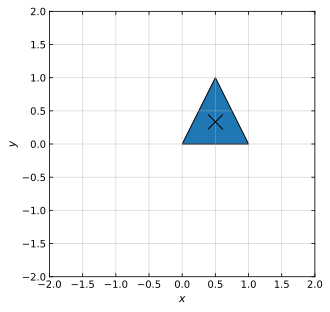

In [3]:
P1 = np.array([0, 0])
P2 = np.array([1, 0])
P3 = np.array([0.5, 1])
t = Triangle(P1, P2, P3)

fig, ax = plt.subplots()
ax.set(xlim=(-2,2), ylim=(-2,2), xlabel=r'$x$', ylabel=r'$y$')
ax.set_aspect('equal')
ax.grid(alpha=0.5)
t.draw(ax)

C:\Users\Jakob\AppData\Local\Temp\ipykernel_5332\2152415525.py:47: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  self.cross.set_data(self.centroid)


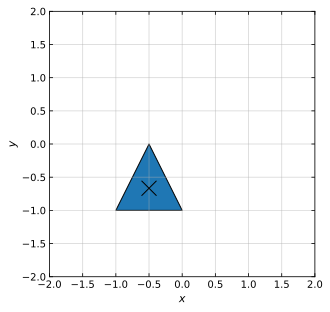

In [4]:
t.move(ax, np.array([-1, -1]))
fig

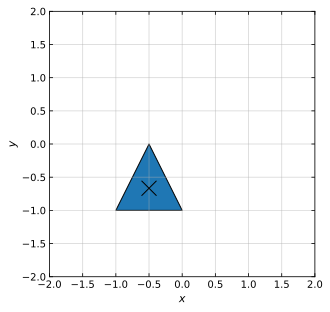

In [5]:
t = Triangle(P1, P2, P3)
fig, ax = plt.subplots()
ax.set(xlim=(-2,2), ylim=(-2,2), xlabel=r'$x$', ylabel=r'$y$')
ax.set_aspect('equal')
ax.grid(alpha=0.5)
t.draw(ax)

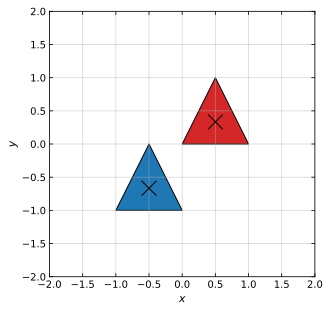

In [6]:
t.move(ax, np.array([1, 1]), copy=True, new_color='tab:red')
fig